In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
while "notebooks" in os.getcwd():
    os.chdir("..")

from src.preprocessing.parser import Parser


from typing import Dict

In [23]:
filename = "data/testfiles/test1.txt"
M : int = None
N : int = None
K : int = None
p : float = None

data : Dict[int, pd.DataFrame] = {}
tmp = {}

with open(filename, 'r') as file:
    n,k = 0,0
    for idx, line in enumerate(file):
        numbers = [float(valor) for valor in line.split()]

        if idx >= 4:

            if k == K:
                k = 0

                n+=1
                if n == N:
                    n = 0


            for m in range(M):
                key = tuple([k,m])

                if data[n].get(key) is None:
                    data[n][key] = [numbers[m]]
                
                else:
                    data[n][key].append(numbers[m])
            k+=1

        elif idx == 0:
            N = int(numbers[0])

        elif idx == 1:  
            M = int(numbers[0])

        elif idx == 2:
            K = int(numbers[0])
        
        else: #if idx == 3
            p = numbers[0]
            for i in range(N):
                data[i] = {}


In [5]:
M

2

In [24]:
data

{0: {(0, 0): [1.0, 65.0],
  (0, 1): [12.0, 98.0],
  (1, 0): [19.0, 62.0],
  (1, 1): [35.0, 90.0],
  (2, 0): [37.0, 23.0],
  (2, 1): [50.0, 95.0]},
 1: {(0, 0): [20.0, 49.0],
  (0, 1): [50.0, 54.0],
  (1, 0): [16.0, 76.0],
  (1, 1): [17.0, 81.0],
  (2, 0): [1.0, 50.0],
  (2, 1): [7.0, 85.0]},
 2: {(0, 0): [13.0, 24.0],
  (0, 1): [36.0, 86.0],
  (1, 0): [34.0, 41.0],
  (1, 1): [46.0, 62.0],
  (2, 0): [1.0, 63.0],
  (2, 1): [27.0, 87.0]},
 3: {(0, 0): [16.0, 15.0],
  (0, 1): [28.0, 56.0],
  (1, 0): [1.0, 13.0],
  (1, 1): [32.0, 95.0],
  (2, 0): [35.0, 41.0],
  (2, 1): [43.0, 42.0]}}

In [28]:
df = pd.Series(data[0]).reset_index()\
    .rename(columns={
        "level_0": "k",
        "level_1" : "m",
    })

In [31]:
pd.DataFrame(data)

0             1             2             3
0 0   [1.0, 65.0]  [20.0, 49.0]  [13.0, 24.0]  [16.0, 15.0]
  1  [12.0, 98.0]  [50.0, 54.0]  [36.0, 86.0]  [28.0, 56.0]
1 0  [19.0, 62.0]  [16.0, 76.0]  [34.0, 41.0]   [1.0, 13.0]
  1  [35.0, 90.0]  [17.0, 81.0]  [46.0, 62.0]  [32.0, 95.0]
2 0  [37.0, 23.0]   [1.0, 50.0]   [1.0, 63.0]  [35.0, 41.0]
  1  [50.0, 95.0]   [7.0, 85.0]  [27.0, 87.0]  [43.0, 42.0]

In [34]:
df['p_k,m'] = df[0].apply(lambda x: x[0])
df['r_k,m'] = df[0].apply(lambda x: x[1])
df.drop(columns=0)

,k,m,"p_k,m","r_k,m"
0,0,0,1.0,65.0
1,0,1,12.0,98.0
2,1,0,19.0,62.0
3,1,1,35.0,90.0
4,2,0,37.0,23.0
5,2,1,50.0,95.0


In [38]:
parser = Parser("data/testfiles/test5.txt")
dataset = parser.read()

In [39]:
dataset['data'][0]

,k,m,n,"p_k,m,n","r_k,m,n"
0,0,0,0,285.0,15.0
1,0,1,0,291.0,26.0
2,0,2,0,312.0,34.0
3,0,3,0,524.0,90.0
4,1,0,0,18.0,29.0
5,1,1,0,135.0,43.0
6,1,2,0,291.0,95.0
7,1,3,0,569.0,95.0
8,2,0,0,330.0,39.0
9,2,1,0,367.0,67.0


## Visualizing data

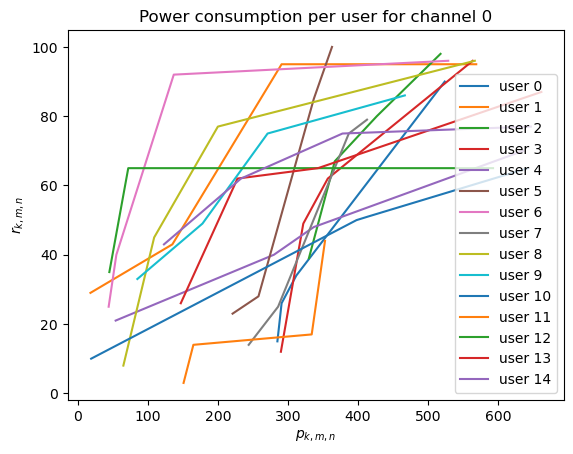

In [40]:
n = 0
for x in dataset['data'][n].groupby("k"):
    k = x[0]
    p_kmn = x[1]['p_k,m,n']
    r_kmn = x[1]['r_k,m,n']
    plt.plot(
        p_kmn, 
        r_kmn,
        label = f"user {k}"
    )

plt.title(f"Power consumption per user for channel {n}")
plt.xlabel("$p_{k,m,n}$")
plt.ylabel("$r_{k,m,n}$")
plt.legend()